# Test wavefront polynomial fitting
1. Generate synthetic wavefront and validate. 
2. Create optical train, fit wavefront and validate

In [1]:
# Model imports
import model_tools.raytrace as rt
import model_tools.propagation as pt

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

root_dir = Path('/home/steven/Documents/qi2lab/github/raytracing_sjs/data')
save_dir = Path('mismatched_objective')
savedir = rt.get_unique_dir(root_dir, save_dir)

## Sythetic wavefront test
1. Generate synthetic wavefront using polynomial
2. Fit
3. Plot synthetic vs fit results

Difference in fit and ground truth:[-1.77635684e-15  4.94049246e-14 -6.88338275e-13  4.37438974e-12
 -1.49715795e-11  2.92115221e-11 -3.24824889e-11  1.91468508e-11
 -4.64134287e-12]


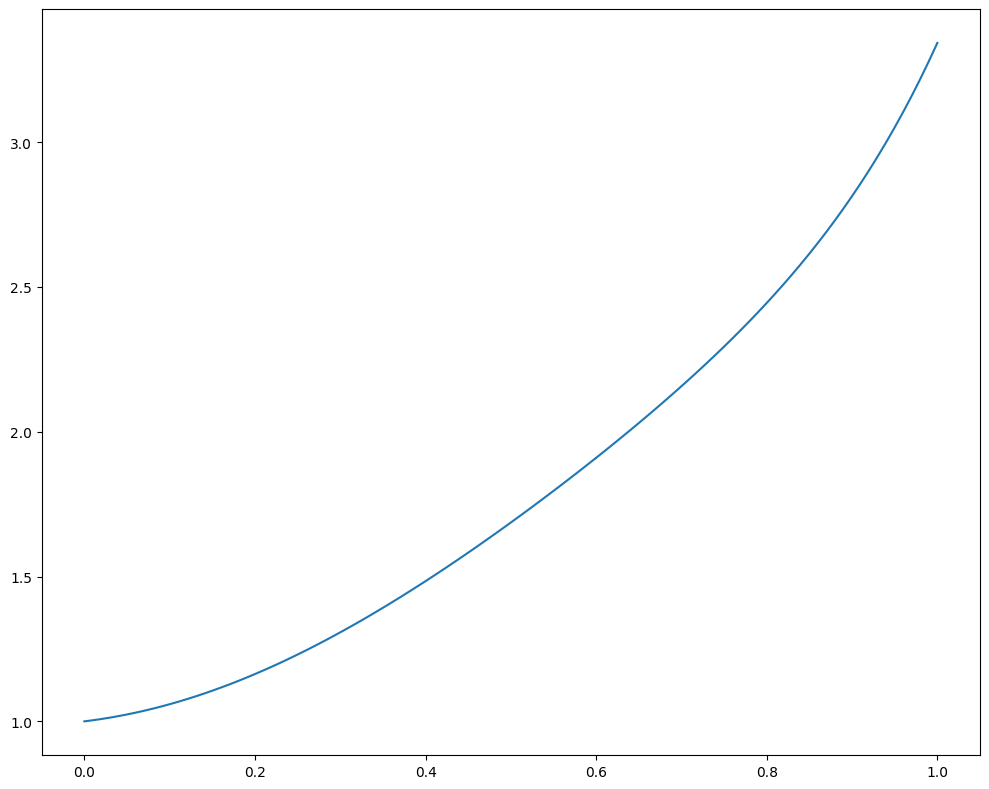

In [8]:
def ground_truth(r, coeff):
    wf = 0
    for ii, c in enumerate(coeff):
        wf += r**ii * c
    return wf

r = np.linspace(0, 1, 100)
synthetic_coeff = [1, 0.36, 2.3212, 0.2, -2.223, 1.23, 0, 0, .4542]
synthetic_wf = ground_truth(r, synthetic_coeff)

# generate synthetic rays for fitting
rays = np.ones((2,100,4))
rays[-1, :, 0] = r
rays[-1, :, 3] = synthetic_wf

fig, ax = plt.subplots(1,1, figsize=(10,8), sharex=True, tight_layout=True)
ax.plot(r, synthetic_wf)

fit_params = rt.ray_opl_polynomial(rays, method='opl')
print(f'Difference in fit and ground truth:{(synthetic_coeff - fit_params)}')

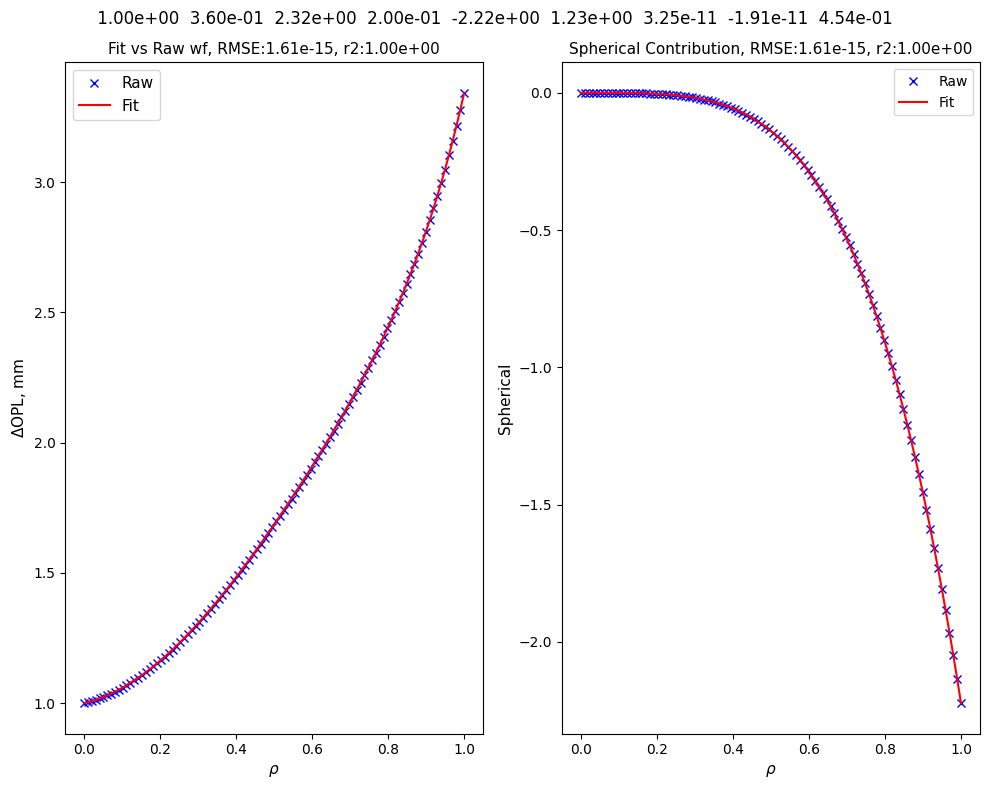

In [9]:
fit = 0

# Plot fit against the data
for ii in range(len(fit_params)):
    fit += r**ii * fit_params[ii]
fit_no_spher = fit - fit_params[4] * r**4

fit_error = fit - synthetic_wf
fit_sqerror = np.square(fit_error) # squared errors
fit_mnsqerror = np.mean(fit_sqerror) # mean squared errors
fit_rmse = np.sqrt(fit_mnsqerror) # Root Mean Squared Error, RMSE
fit_rsq = 1.0 - (np.var(fit_error) / np.var(synthetic_wf))

sph_error = (synthetic_wf - fit_no_spher) - fit_params[4] * r**4

sph_sqerror = np.square(sph_error) # squared errors
sph_mnsqerror = np.mean(sph_sqerror) # mean squared errors
sph_rmse = np.sqrt(sph_mnsqerror) # Root Mean Squared Error, RMSE
sph_rsq = 1.0 - (np.var(sph_error) / np.var((synthetic_wf - fit_no_spher)))

fit_str = ''
for ft in fit_params:
    fit_str += f' {ft:.2e} '

fig, axs = plt.subplots(1,2, figsize=(10,8), sharex=True, tight_layout=True)
fig.suptitle(fit_str, fontsize=12)
ax = axs[0]
ax.set_title(f'Fit vs Raw wf, RMSE:{fit_rmse:.2e}, r2:{fit_rsq:.2e}', fontsize=11)
ax.set_xlabel(xlabel=r'$\rho$', fontsize=11)
ax.set_ylabel(ylabel=r'$\Delta$OPL, mm', fontsize=11)
ax.plot(r, synthetic_wf, 'bx', label='Raw')
ax.plot(r, fit, 'r', label='Fit')
ax.legend(fontsize=11)

ax = axs[1]
ax.set_title(f'Spherical Contribution, RMSE:{sph_rmse:.2e}, r2:{sph_rsq:.2e}', fontsize=11)
ax.set_xlabel(r'$\rho$', fontsize=11)
ax.set_ylabel('Spherical', fontsize=11)
ax.plot(r, synthetic_wf - fit_no_spher, 'bx', label="Raw")
ax.plot(r, fit_params[4] * r**4, 'r', label='Fit')
ax.legend()
plt.show()
